In [1]:
!pip install pandas matplotlib seaborn plotly

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#### Loading and Exploring Data

In [5]:
# Load dataset
data = pd.read_csv("dairy_dataset.csv")

In [6]:
# Show basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [7]:
# Summary statistics of numerical columns
print(data.describe())

       Total Land Area (acres)  Number of Cows   Product ID  \
count              4325.000000     4325.000000  4325.000000   
mean                503.483073       54.963699     5.509595   
std                 285.935061       26.111487     2.842979   
min                  10.170000       10.000000     1.000000   
25%                 252.950000       32.000000     3.000000   
50%                 509.170000       55.000000     6.000000   
75%                 751.250000       77.000000     8.000000   
max                 999.530000      100.000000    10.000000   

       Quantity (liters/kg)  Price per Unit   Total Value  Shelf Life (days)  \
count           4325.000000     4325.000000   4325.000000        4325.000000   
mean             500.652657       54.785938  27357.845411          29.127630   
std              288.975915       26.002815  21621.051594          30.272114   
min                1.170000       10.030000     42.516500           1.000000   
25%              254.170000     

In [8]:
# Inspect the first few rows
data.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


### Data Wrangling

In [9]:
# Handling missing values (basic example; more nuanced methods may be necessary)
data = data.dropna()

In [11]:
# Convert date columns to datetime
# Changing the format to '%Y-%m-%d' to match the actual format.
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Production Date'] = pd.to_datetime(data['Production Date'], format='%Y-%m-%d')
data['Expiration Date'] = pd.to_datetime(data['Expiration Date'], format='%Y-%m-%d')

In [12]:
# Removing duplicates, if any
data = data.drop_duplicates()

In [13]:
# Example: Filter out rows with extreme values in 'Quantity Sold' or 'Total Revenue'
data = data[(data['Quantity Sold (liters/kg)'] < data['Quantity Sold (liters/kg)'].quantile(0.99)) &
            (data['Approx. Total Revenue(INR)'] < data['Approx. Total Revenue(INR)'].quantile(0.99))]

## Exploratory Data Analysis

Monthly Sales Trend

In [14]:
# Extract month and year from 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [15]:
# Group by Year and Month to analyze sales over time
monthly_sales = data.groupby(['Year', 'Month'])['Quantity Sold (liters/kg)'].sum().reset_index()

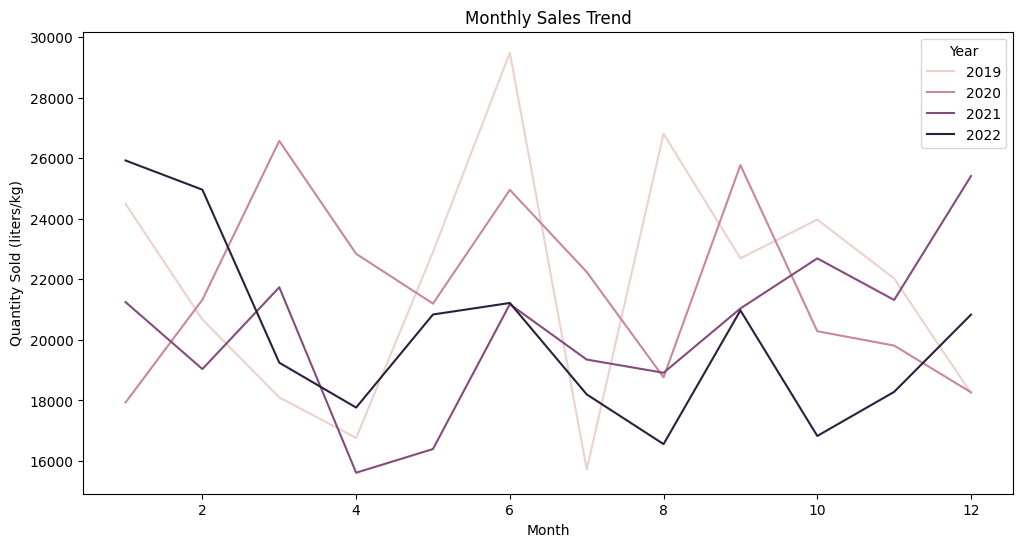

In [16]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Quantity Sold (liters/kg)', hue='Year', data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Year")
plt.show()

 Product Performance

In [17]:
# Group by Product Name to get total sales for each product
product_sales = data.groupby('Product Name')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False).reset_index()

<ipython-input-18-1b52d2e5460c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity Sold (liters/kg)', y='Product Name', data=product_sales.head(10), palette='viridis')


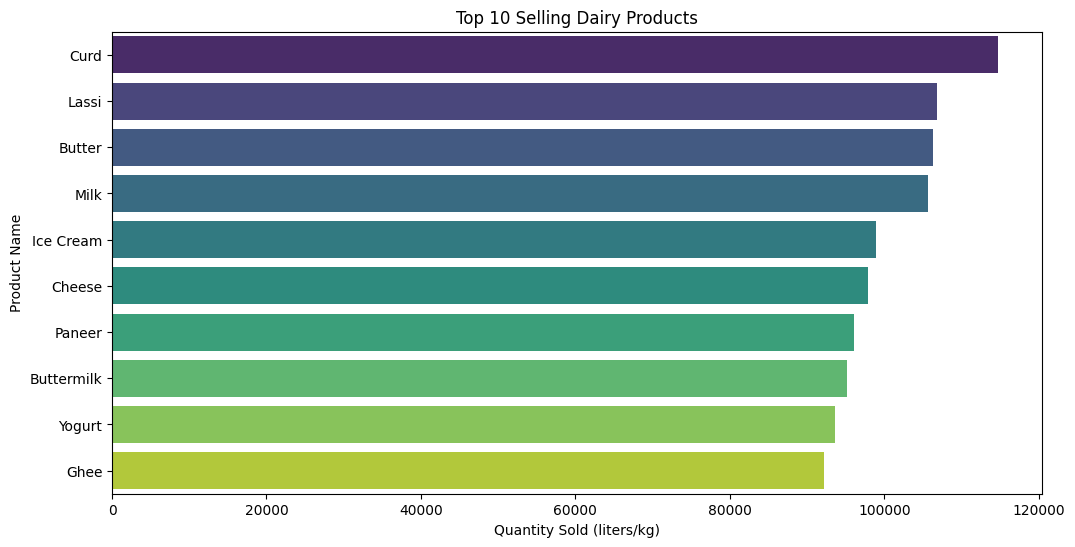

In [18]:
# Plot Product Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Sold (liters/kg)', y='Product Name', data=product_sales.head(10), palette='viridis')
plt.title("Top 10 Selling Dairy Products")
plt.xlabel("Quantity Sold (liters/kg)")
plt.ylabel("Product Name")
plt.show()

Seasonal Analysis

In [19]:
# Group by Product Category, Month to see seasonal sales patterns
seasonal_sales = data.groupby(['Product Name', 'Month'])['Quantity Sold (liters/kg)'].sum().reset_index()

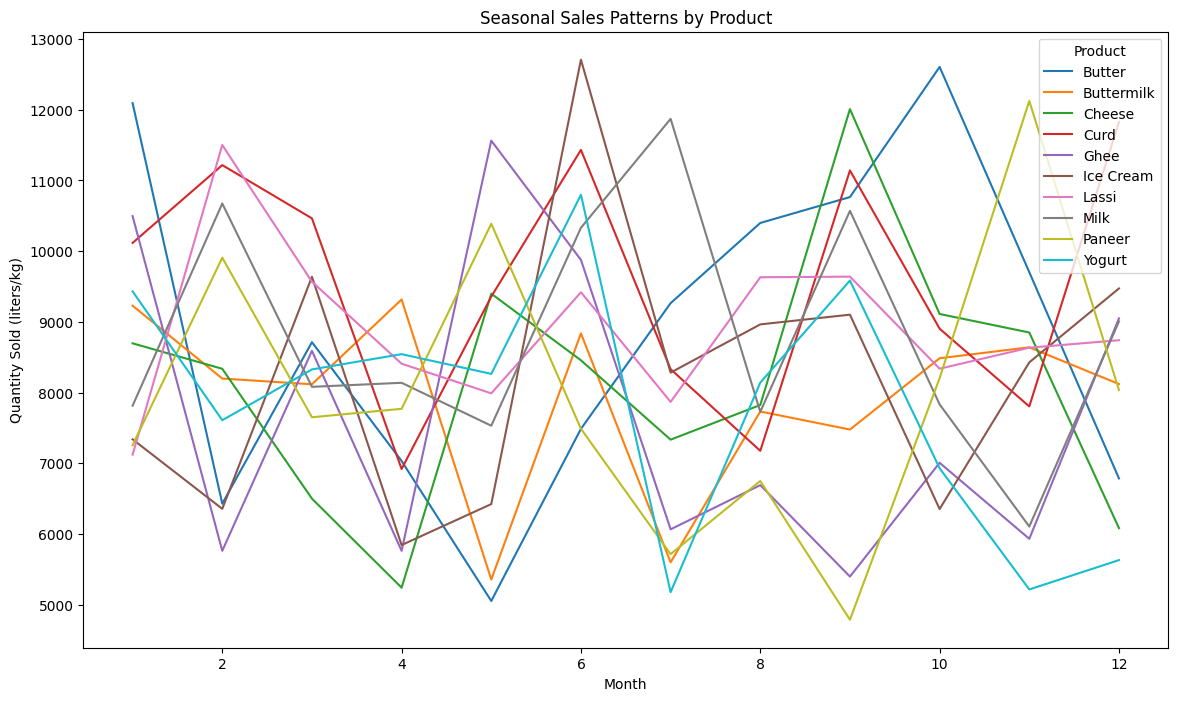

In [20]:
# Plot Seasonal Sales Patterns
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Quantity Sold (liters/kg)', hue='Product Name', data=seasonal_sales)
plt.title("Seasonal Sales Patterns by Product")
plt.xlabel("Month")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Product")
plt.show()

Interactive Visualization

In [22]:
# Interactive Sales Trend Visualization by Product Name
fig = px.line(seasonal_sales, x="Month", y="Quantity Sold (liters/kg)", color="Product Name",
              title="Interactive Seasonal Sales Patterns by Product",
              labels={"Quantity Sold (liters/kg)": "Quantity Sold (liters/kg)", "Month": "Month"})
fig.show()